### Student Information
Name:Nichaporn Bunyakaranun

Student ID:109065431

GitHub ID:109065431

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [115]:
### Begin Assignment Here

# Data preparation (import text file)
df1=pd.read_csv('amazon_cells_labelled.txt', sep="\t", names=["sentence", "sentiment"])
df1['company']= "amazon"
df1

,sentence,sentiment,company
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,amazon
997,Item Does Not Match Picture.,0,amazon
998,The only thing that disappoint me is the infra...,0,amazon


In [116]:
df2=pd.read_csv('imdb_labelled.txt', sep="\t", names=["sentence", "sentiment"])
df2['company']= "imdb"
df2

,sentence,sentiment,company
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


In [117]:
df3=pd.read_csv('yelp_labelled.txt', sep="\t", names=["sentence", "sentiment"])
df3['company']= "yelp"
df3

,sentence,sentiment,company
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [42]:
### Begin Assignment Here                                                           deleteeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

# Data preparation
import pandas as pd
filenames = ["amazon_cells_labelled.txt",
"imdb_labelled.txt", "yelp_labelled.txt"]

list_df= []
for f in filenames:
    list_df.append(pd.read_csv(f, sep="\t", names=["sentence", "sentiment"]))
    
list_df

[                                              sentence  sentiment
 0    So there is no way for me to plug it in here i...          0
 1                          Good case, Excellent value.          1
 2                               Great for the jawbone.          1
 3    Tied to charger for conversations lasting more...          0
 4                                    The mic is great.          1
 ..                                                 ...        ...
 995  The screen does get smudged easily because it ...          0
 996  What a piece of junk.. I lose more calls on th...          0
 997                       Item Does Not Match Picture.          0
 998  The only thing that disappoint me is the infra...          0
 999  You can not answer calls with the unit, never ...          0
 
 [1000 rows x 2 columns],
                                               sentence  sentiment
 0    A very, very, very slow-moving, aimless movie ...          0
 1    Not sure who was more lost -

In [122]:
#instruct dataframe
df = pd.concat([df1, df2,df3])
df

,sentence,sentiment,company
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [123]:
len(df)

2748

In [125]:
#Adding column sentiment_name
import numpy as np
df['sentiment_name'] = np.where(df.sentiment == 0 , 'Negative', 'Positive')  
df[0:20]

,sentence,sentiment,company,sentiment_name
0,So there is no way for me to plug it in here i...,0,amazon,Negative
1,"Good case, Excellent value.",1,amazon,Positive
2,Great for the jawbone.,1,amazon,Positive
3,Tied to charger for conversations lasting more...,0,amazon,Negative
4,The mic is great.,1,amazon,Positive
5,I have to jiggle the plug to get it to line up...,0,amazon,Negative
6,If you have several dozen or several hundred c...,0,amazon,Negative
7,If you are Razr owner...you must have this!,1,amazon,Positive
8,"Needless to say, I wasted my money.",0,amazon,Negative
9,What a waste of money and time!.,0,amazon,Negative


In [126]:
#Finding missing value
df.isnull()

,sentence,sentiment,company,sentiment_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [127]:
#Count missing value
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,sentiment,company,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [128]:
sum(df.duplicated('sentence'))                                         #deleteeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

17

In [129]:
#find duplicated sentence, and sort by lexical                            deleteeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
df[df.duplicated()].sort_values(by=['sentence']) 

,sentence,sentiment,company,sentiment_name
590,10/10,1,imdb,Positive
165,Definitely worth checking out.,1,imdb,Positive
748,Does not fit.,0,amazon,Negative
543,Don't buy this product.,0,amazon,Negative
892,Excellent product for the price.,1,amazon,Positive
792,Great Phone.,1,amazon,Positive
285,Great phone!.,1,amazon,Positive
896,Great phone.,1,amazon,Positive
814,I love this place.,1,yelp,Positive
843,I won't be back.,0,yelp,Negative


In [145]:
#Sampling data
df_sample=df.sample(n=500, random_state=1)                                   #how much should be sampling?????????

In [146]:
len(df_sample)

500

In [147]:
df_sample[0:600]

,sentence,sentiment,company,sentiment_name
112,I mean this in a terrible way.,0,imdb,Negative
175,Perhaps I caught them on an off night judging ...,0,yelp,Negative
301,Later I found myself lost in the power of the ...,1,imdb,Positive
442,"But it is entertaining, nonetheless.",1,imdb,Positive
428,IT'S REALLY EASY.,1,amazon,Positive
...,...,...,...,...
47,AFTER ARGUING WITH VERIZON REGARDING THE DROPP...,0,amazon,Negative
143,It even has its sweet moments.,1,imdb,Positive
545,Tom Wilkinson's character is a man who is not ...,1,imdb,Positive
772,"the food is not tasty at all, not to say its ""...",0,yelp,Negative


<AxesSubplot:>

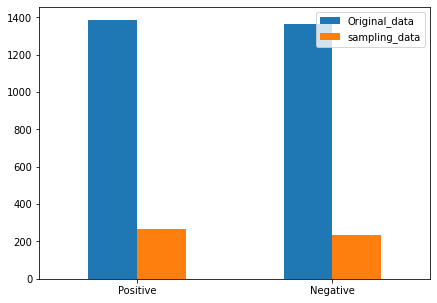

In [148]:
#check whether sampling is representative
pd.concat({'Original_data': df['sentiment_name'].value_counts(), 'sampling_data': df_sample['sentiment_name'].value_counts()
}, axis=1).plot(kind='bar', rot = 0, figsize=(7, 5))

#we can see that the sam

In [152]:
#Feature Creation                                                                #deleteeeeeeeeeeeeeeeeeeeeeeee
import nltk

In [159]:
#Make unigram                                                                    #deleteeeeeeeeeeeeeeeeeeeeeeee
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [160]:
df[0:5]["unigrams"]                                                              #deleteeeeeeeeeeeeeeeeeeeeeeee

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [161]:
df[0:10]                                                                             #deleteeeeeeeeeeeeeeeeeeeeeeee

,sentence,sentiment,company,sentiment_name,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,Negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,Positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,Positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,Negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,Positive,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,Negative,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,Negative,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,Positive,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,Negative,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,Negative,"[What, a, waste, of, money, and, time, !, .]"


In [162]:
list(df[0:1]["unigrams"])                                                 # deleteeeeeeeeeeeeeeeeeeeeeeeeeeeeee

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [165]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

In [173]:
# Check the shape of this matrix by:
df_counts.shape

(2748, 5155)

In [195]:
# Let's see the feature names of the vectorizer (the terms)
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [201]:
#Make unigram and add to dataframe                                #build unigram จากอะไร  NLTK tokenize  หรือ sklearn analyzer 
analyze = count_vect.build_analyzer()                                                                
df['unigrams'] = df['sentence'].apply(lambda x: analyze("".join(list(df.sentence))))      

MemoryError: 

In [ ]:
df[0:5]